# GeoPandas - Strumenti di mappatura e tracciamento

*GeoPandas* fornisce un'interfaccia di alto livello alla libreria matplotlib per creare mappe. La mappatura delle forme è facile come usare il metodo `plot()` su un *GeoSeries* o *GeoDataFrame*.

In [ ]:
!pip install geopandas mapclassify

In [112]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [153]:
zones = gpd.read_file('https://raw.githubusercontent.com/CappuCitti/Python-appunti-ed-esercizi/main/GeoPandas/Data/milanAreaMunicipalities.geojson')
families = pd.read_csv('https://raw.githubusercontent.com/CappuCitti/Python-appunti-ed-esercizi/main/GeoPandas/Data/milanFamilies.csv', sep=";")

In [114]:
zones

,OBJECTID,MUNICIPIO,AREA,PERIMETRO,Shape_Length,Shape_Area,geometry
0,1,1,9.426872e+06,11935.5825,17023.928059,1.917927e+07,"POLYGON ((9.19441 45.47949, 9.19247 45.47968, ..."
1,2,8,2.390648e+07,32807.3751,46822.066578,4.869475e+07,"POLYGON ((9.09930 45.53128, 9.09927 45.53136, ..."
2,3,9,2.101349e+07,27157.1251,38770.632261,4.282107e+07,"POLYGON ((9.17572 45.53560, 9.17569 45.53595, ..."
3,4,2,1.262855e+07,20971.2966,29934.120124,2.572649e+07,"POLYGON ((9.22393 45.52357, 9.22392 45.52363, ..."
4,5,3,1.443424e+07,25665.7875,36616.597573,2.938583e+07,"POLYGON ((9.26874 45.51035, 9.26862 45.51036, ..."
5,6,4,2.069548e+07,22716.0101,32395.731943,4.207919e+07,"POLYGON ((9.26759 45.47204, 9.26631 45.47191, ..."
6,7,7,3.136342e+07,45390.1230,64736.171817,6.381548e+07,"POLYGON ((9.07310 45.50604, 9.07306 45.50606, ..."
7,8,6,1.833622e+07,22297.3464,31791.237541,3.727264e+07,"POLYGON ((9.13975 45.46092, 9.13772 45.46130, ..."
8,9,5,2.995886e+07,29712.8420,42348.674305,6.085250e+07,"POLYGON ((9.18957 45.45197, 9.18861 45.45205, ..."


In [115]:
families

,Anno,Municipio,Eta_capofamiglia,Genere_capofamiglia,Numero_componenti,Famiglie
0,2003,Municipio 1,Da 18 a 34 anni,Maschi,1,1713
1,2003,Municipio 1,Da 18 a 34 anni,Maschi,2,1139
2,2003,Municipio 1,Da 18 a 34 anni,Maschi,3,597
3,2003,Municipio 1,Da 18 a 34 anni,Maschi,4 e più,320
4,2003,Municipio 1,Da 35 a 64 anni,Maschi,1,3391
...,...,...,...,...,...,...
5179,2020,Municipio 9,Da 65 a 79 anni,Femmine,4 e più,110
5180,2020,Municipio 9,80 anni e più,Femmine,1,6608
5181,2020,Municipio 9,80 anni e più,Femmine,2,1293
5182,2020,Municipio 9,80 anni e più,Femmine,3,182


#### Organizzare i dati
Dopo aver importato i dati utili all'analisi, come la mappa di Milano ed il numero di famiglie suddivise per zona è necessario oranizzarle in un unico "contenitore"

In [154]:
families['Municipio'] = families['Municipio'].map(lambda x: x.split(" ")[1])     # Viene eseguita una funzione a tutta la colonna "Municipio" nella quale viene estratto solo il numero del municipio
families = families.rename(columns={'Municipio': 'MUNICIPIO'})                   # Viene rinominata la colonna Municipio in "MUNICIPIO"

data = families.groupby('MUNICIPIO', as_index=False).agg({'Famiglie': 'sum'})
data['MUNICIPIO'] = pd.to_numeric(data['MUNICIPIO'])                             # Si converte la colonna a tipo Integer

final_data = pd.merge(zones, data, on='MUNICIPIO', how='outer')                  # Vengono uniti insieme i due DataFrame basandosi sulla colonna "MUNICIPIO"

final_data

,OBJECTID,MUNICIPIO,AREA,PERIMETRO,Shape_Length,Shape_Area,geometry,Famiglie
0,1,1,9.426872e+06,11935.5825,17023.928059,1.917927e+07,"POLYGON ((9.19441 45.47949, 9.19247 45.47968, ...",853206
1,2,8,2.390648e+07,32807.3751,46822.066578,4.869475e+07,"POLYGON ((9.09930 45.53128, 9.09927 45.53136, ...",1606266
2,3,9,2.101349e+07,27157.1251,38770.632261,4.282107e+07,"POLYGON ((9.17572 45.53560, 9.17569 45.53595, ...",1554174
3,4,2,1.262855e+07,20971.2966,29934.120124,2.572649e+07,"POLYGON ((9.22393 45.52357, 9.22392 45.52363, ...",1298392
4,5,3,1.443424e+07,25665.7875,36616.597573,2.938583e+07,"POLYGON ((9.26874 45.51035, 9.26862 45.51036, ...",1245073
5,6,4,2.069548e+07,22716.0101,32395.731943,4.207919e+07,"POLYGON ((9.26759 45.47204, 9.26631 45.47191, ...",1372730
6,7,7,3.136342e+07,45390.1230,64736.171817,6.381548e+07,"POLYGON ((9.07310 45.50604, 9.07306 45.50606, ...",1514525
7,8,6,1.833622e+07,22297.3464,31791.237541,3.727264e+07,"POLYGON ((9.13975 45.46092, 9.13772 45.46130, ...",1327497
8,9,5,2.995886e+07,29712.8420,42348.674305,6.085250e+07,"POLYGON ((9.18957 45.45197, 9.18861 45.45205, ...",1074757


In [117]:
final_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      9 non-null      int64   
 1   MUNICIPIO     9 non-null      int64   
 2   AREA          9 non-null      float64 
 3   PERIMETRO     9 non-null      float64 
 4   Shape_Length  9 non-null      float64 
 5   Shape_Area    9 non-null      float64 
 6   geometry      9 non-null      geometry
 7   Famiglie      9 non-null      int64   
dtypes: float64(4), geometry(1), int64(3)
memory usage: 648.0 bytes


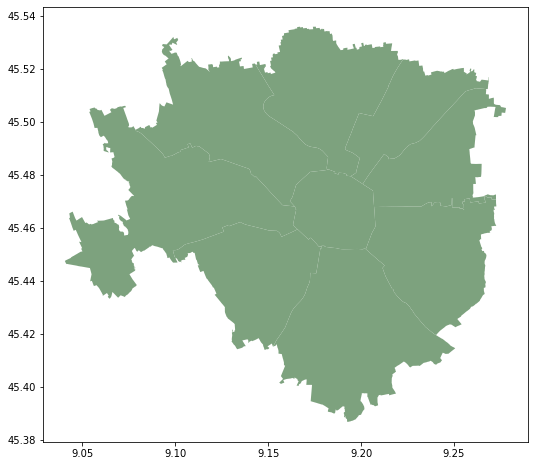

In [118]:
final_data.plot(figsize=(20,8), color='#7da27e')

### Mappe coropletiche
*GeoPandas* semplifica la creazione di mappe coropletiche (mappe in cui il colore di ogni forma si basa sul valore di una variabile associata). Utilizzare semplicemente il comando plot con l'argomento della colonna impostato sulla colonna i cui valori si desidera utilizzare per assegnare i colori.

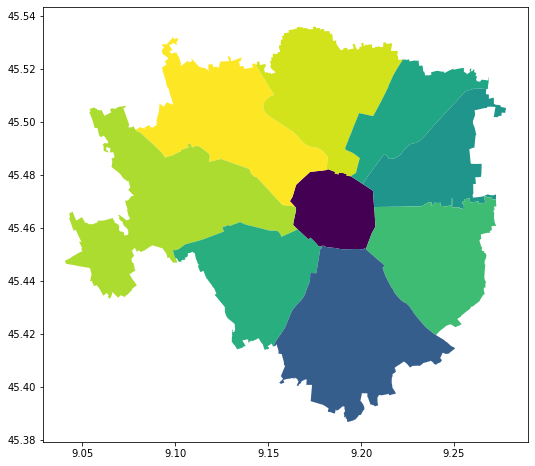

In [119]:
final_data.plot(figsize=(20,8), column='Famiglie')

### Creare una leggenda
Quando si traccia una mappa, è possibile abilitare una legenda

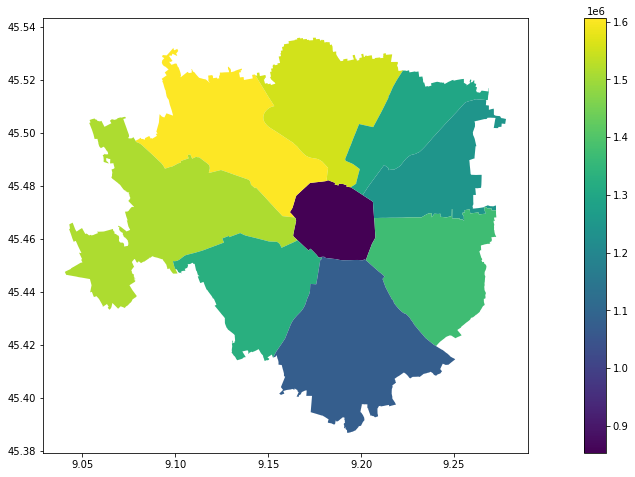

In [155]:
final_data.plot(figsize=(20,8), column='Famiglie', legend=True)

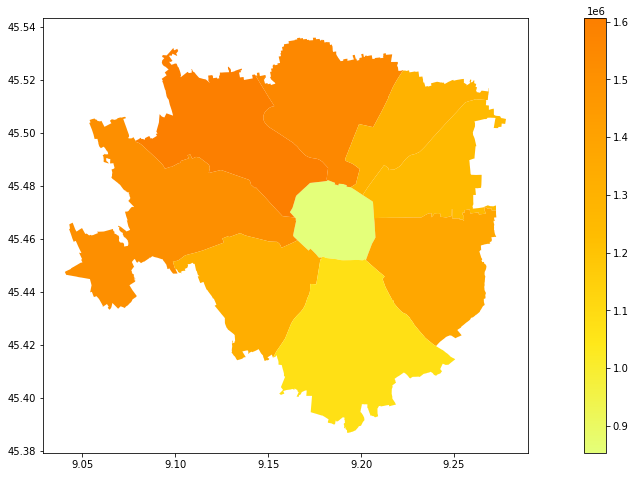

In [156]:
final_data.plot(figsize=(20,8), column='Famiglie', legend=True, cmap='Wistia')

### Dati mancanti
In alcuni casi si potrebbe voler tracciare dati che contengono valori mancanti, per questo tipo mappa è necessario utilizzare il modulo `mapclassify` precedentemente importato.

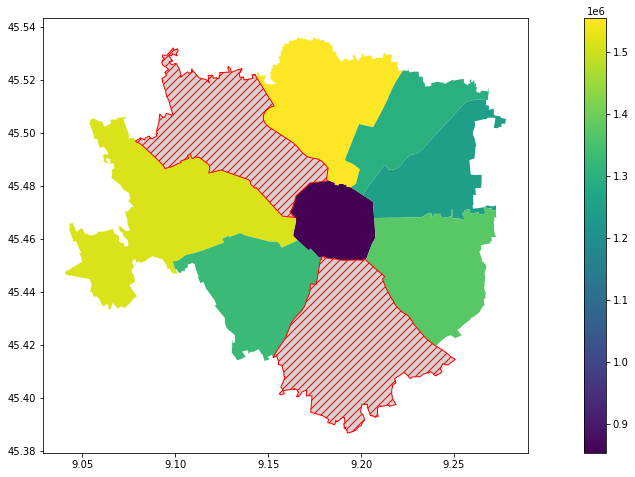

In [158]:
final_data.loc[(final_data['MUNICIPIO'] == 5) | (final_data['MUNICIPIO'] == 8), 'Famiglie'] = np.nan

final_data.plot(figsize=(20, 8), column="Famiglie", legend=True, missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"});